## 練習一：回歸問題(Regression)

#### 1.1導入需要的函式

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.ensemble

from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### 1.2查看資料樣態

In [2]:
# 載入小費(tips)資料集
tips = pd.read_csv(r'./tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### 1.3資料前處理

In [3]:
# 進行One hot encoding
data = pd.get_dummies(tips) 
data.head()

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,True,False,True,False,False,False,True,False,True,False
1,10.34,1.66,3,False,True,True,False,False,False,True,False,True,False
2,21.01,3.50,3,False,True,True,False,False,False,True,False,True,False
3,23.68,3.31,2,False,True,True,False,False,False,True,False,True,False
4,24.59,3.61,4,True,False,True,False,False,False,True,False,True,False


In [4]:
# 檢查空值
data.isnull().values.any()

np.False_

#### 1.4資料集切分

In [5]:
# 特徵/標籤劃分
feature = data.drop('total_bill',axis=1)
label = data['total_bill']

X_train, X_test, y_train, y_test = train_test_split(feature, label, random_state=0) #訓練測試資料拆分

In [6]:
# 模型建立與預測
model = LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

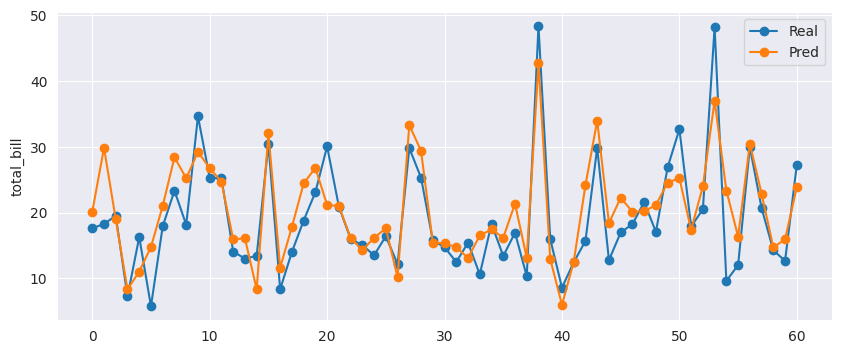

In [7]:
# 結果可視化
plt.figure(figsize=(10,4))
plt.plot(range(len(y_test)),y_test,'o-', label="Real")
plt.plot(range(len(y_pred)),y_pred,'o-', label="Pred")
plt.legend()
plt.ylabel("total_bill")
plt.show()

In [8]:
print('MAE:',mean_absolute_error(y_test,y_pred)) #計算 MAE
print('MSE:',mean_squared_error(y_test,y_pred)) #計算 MSE
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred))) #計算 RMSE
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred)) #計算 MAPE 

# **真實值在前，預測值在後

MAE: 3.6289449047219966
MSE: 21.87394672828186
RMSE: 4.676959132629006
MAPE: 0.23152537430797518


## 練習二：分類問題(Classification)

In [9]:
# 載入需要的套件
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler

In [10]:
# 將資料集存成Dataframe格式
df = pd.DataFrame(data= load_iris().data, columns=load_iris().feature_names)
df['Target'] = load_iris().target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
# 把特徵與目標分開
X = df.drop('Target' , axis=1)
y = df['Target']

In [12]:
# 做正規化 (不是標準化!!!!!!)
X = MinMaxScaler().fit_transform(X)

In [13]:
# 切分資料集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# 訓練模型
cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
# 使用測試集來進行預測
y_pred = cart.predict(X_test)

In [16]:
# 評估指標
print('ACC: ', accuracy_score(y_test, y_pred))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print('Report : \n', classification_report(y_test, y_pred))

ACC:  1.0
Confusion matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 練習三：聚類問題(Clustering)

In [17]:
from sklearn.cluster import KMeans

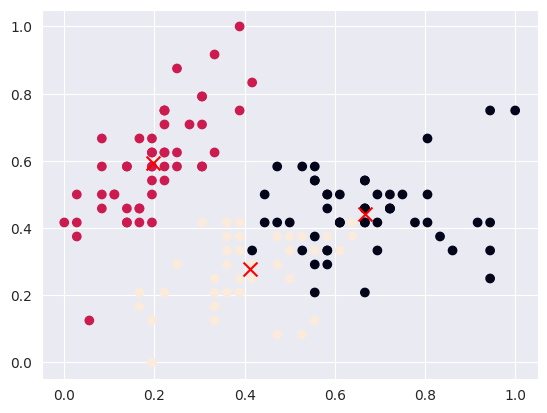

In [18]:
km = KMeans(n_clusters=3)
## 沿用上面iris資料集的數據
km.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=km.labels_)
## x是每群的中心
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='x', s=100, color='red')
plt.show()